<h1>Projekt klasyfikacji szkła</h1>

<h2>Kontekst</h2>

Kod jest testowany na zbiorze danych Glass Classification (https://www.kaggle.com/uciml/glass)

<h3>Zawartość bazy danych:</h3>
<ol>
    <li>Id numeryczne: od 1 do 214</li>
    <li>Refrakcja światła</li>
    <li>Na: Sód</li>
    <li>Mg: Magnez</li>
    <li> Al: Aluminium</li>
    <li> Si: Krzem</li>
    <li>K: Potas</li>
    <li> Ca: Wapń</li>
    <li> Ba: Bar</li>
    <li>Fe: Żelazo</li>
    <li>Typ szkła:
    <ol>
        <li>okienne(budunki) płaskie przetworzone</li>
        <li>okienne(budunki) niepłaskie przetworzone</li>
        <li>okienne(samochodowe) płaskie przetworzone</li>
        <li>okienne(samochodowe) niepłaskie przetworzone (nie ma w tej bazie danych)</li>
        <li>naczynie żaroodporne</li>
        <li>szklana zastawa</li>
        <li>reflektor(samochodowy) przedni</li>
    </ol>
    </li>
</ol>

<h2>Importy</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.svm import SVC

pd.options.display.float_format = "{:.2f}".format 

<h2>Opis danych</h2>

In [2]:
glass_raw = pd.read_csv('glass.csv')
print(glass_raw, '\n')
print("All glass types: ", glass_raw['Type'].unique(), '\n')
print(glass_raw.info())
glass_raw.describe()

      RI    Na   Mg   Al    Si    K   Ca   Ba   Fe  Type
0   1.52 13.64 4.49 1.10 71.78 0.06 8.75 0.00 0.00     1
1   1.52 13.89 3.60 1.36 72.73 0.48 7.83 0.00 0.00     1
2   1.52 13.53 3.55 1.54 72.99 0.39 7.78 0.00 0.00     1
3   1.52 13.21 3.69 1.29 72.61 0.57 8.22 0.00 0.00     1
4   1.52 13.27 3.62 1.24 73.08 0.55 8.07 0.00 0.00     1
..   ...   ...  ...  ...   ...  ...  ...  ...  ...   ...
209 1.52 14.14 0.00 2.88 72.61 0.08 9.18 1.06 0.00     7
210 1.52 14.92 0.00 1.99 73.06 0.00 8.40 1.59 0.00     7
211 1.52 14.36 0.00 2.02 73.42 0.00 8.44 1.64 0.00     7
212 1.52 14.38 0.00 1.94 73.61 0.00 8.48 1.57 0.00     7
213 1.52 14.23 0.00 2.08 73.36 0.00 8.62 1.67 0.00     7

[214 rows x 10 columns] 

All glass types:  [1 2 3 5 6 7] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,1.52,13.41,2.68,1.44,72.65,0.50,8.96,0.18,0.06,2.78
std,0.00,0.82,1.44,0.50,0.77,0.65,1.42,0.50,0.10,2.10
min,1.51,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00,1.00
25%,1.52,12.91,2.11,1.19,72.28,0.12,8.24,0.00,0.00,1.00
50%,1.52,13.30,3.48,1.36,72.79,0.56,8.60,0.00,0.00,2.00
75%,1.52,13.82,3.60,1.63,73.09,0.61,9.17,0.00,0.10,3.00
max,1.53,17.38,4.49,3.50,75.41,6.21,16.19,3.15,0.51,7.00


Jak można zauważyć dane znajdujące się w pliku glass.csv opisują różne rodzaje szkła ze względu na zawartość poszczególnych pierwiastów oraz współczynnik załamania światła. Typy szkła scharakteryzowane są poprzez 9 różnych atrybutów i 10. decyzyjny. W danych można wyróżnić 6 różnych typów szkła. Dzięki ostatniej tabeli można zauważyć, że średnie wartości poszególnych atrybutów nie rożnią sie znacznie, poza atrybuttem Si. Ponadto atrybut RI jest niemalże stały i wynosi średnio 1.52 dla wszystkich typów. Plik z danymi nie zawiera żadnych wartości pustych (null) i wszystkie atrybuty są opisane cyframi.

<h2>Rozkład typów szkła</h2>

Text(0.5, 1.0, 'Count of Glass Types')

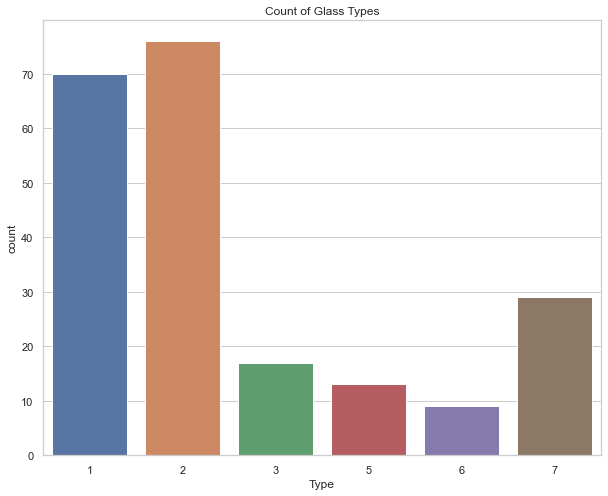

In [3]:
sns.set_theme(style="whitegrid", font_scale=1)
plt.subplots(figsize = (10,8))
sns.countplot(x='Type',data=glass_raw).set_title('Count of Glass Types')

Jak możemy zauważyć najwięcej jest szkła okiennego(budynki - typ 1 i 2), potem jest szkoło reflektorowe (typ 7) pozostałych typów jest mniej więcej podobnie (typy 3, 5, 6), typ 4 nie występuje.

<h2>Rozkład atrybutów</h2>

C:\Users\wylukkoazk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wylukkoazk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wylukkoazk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

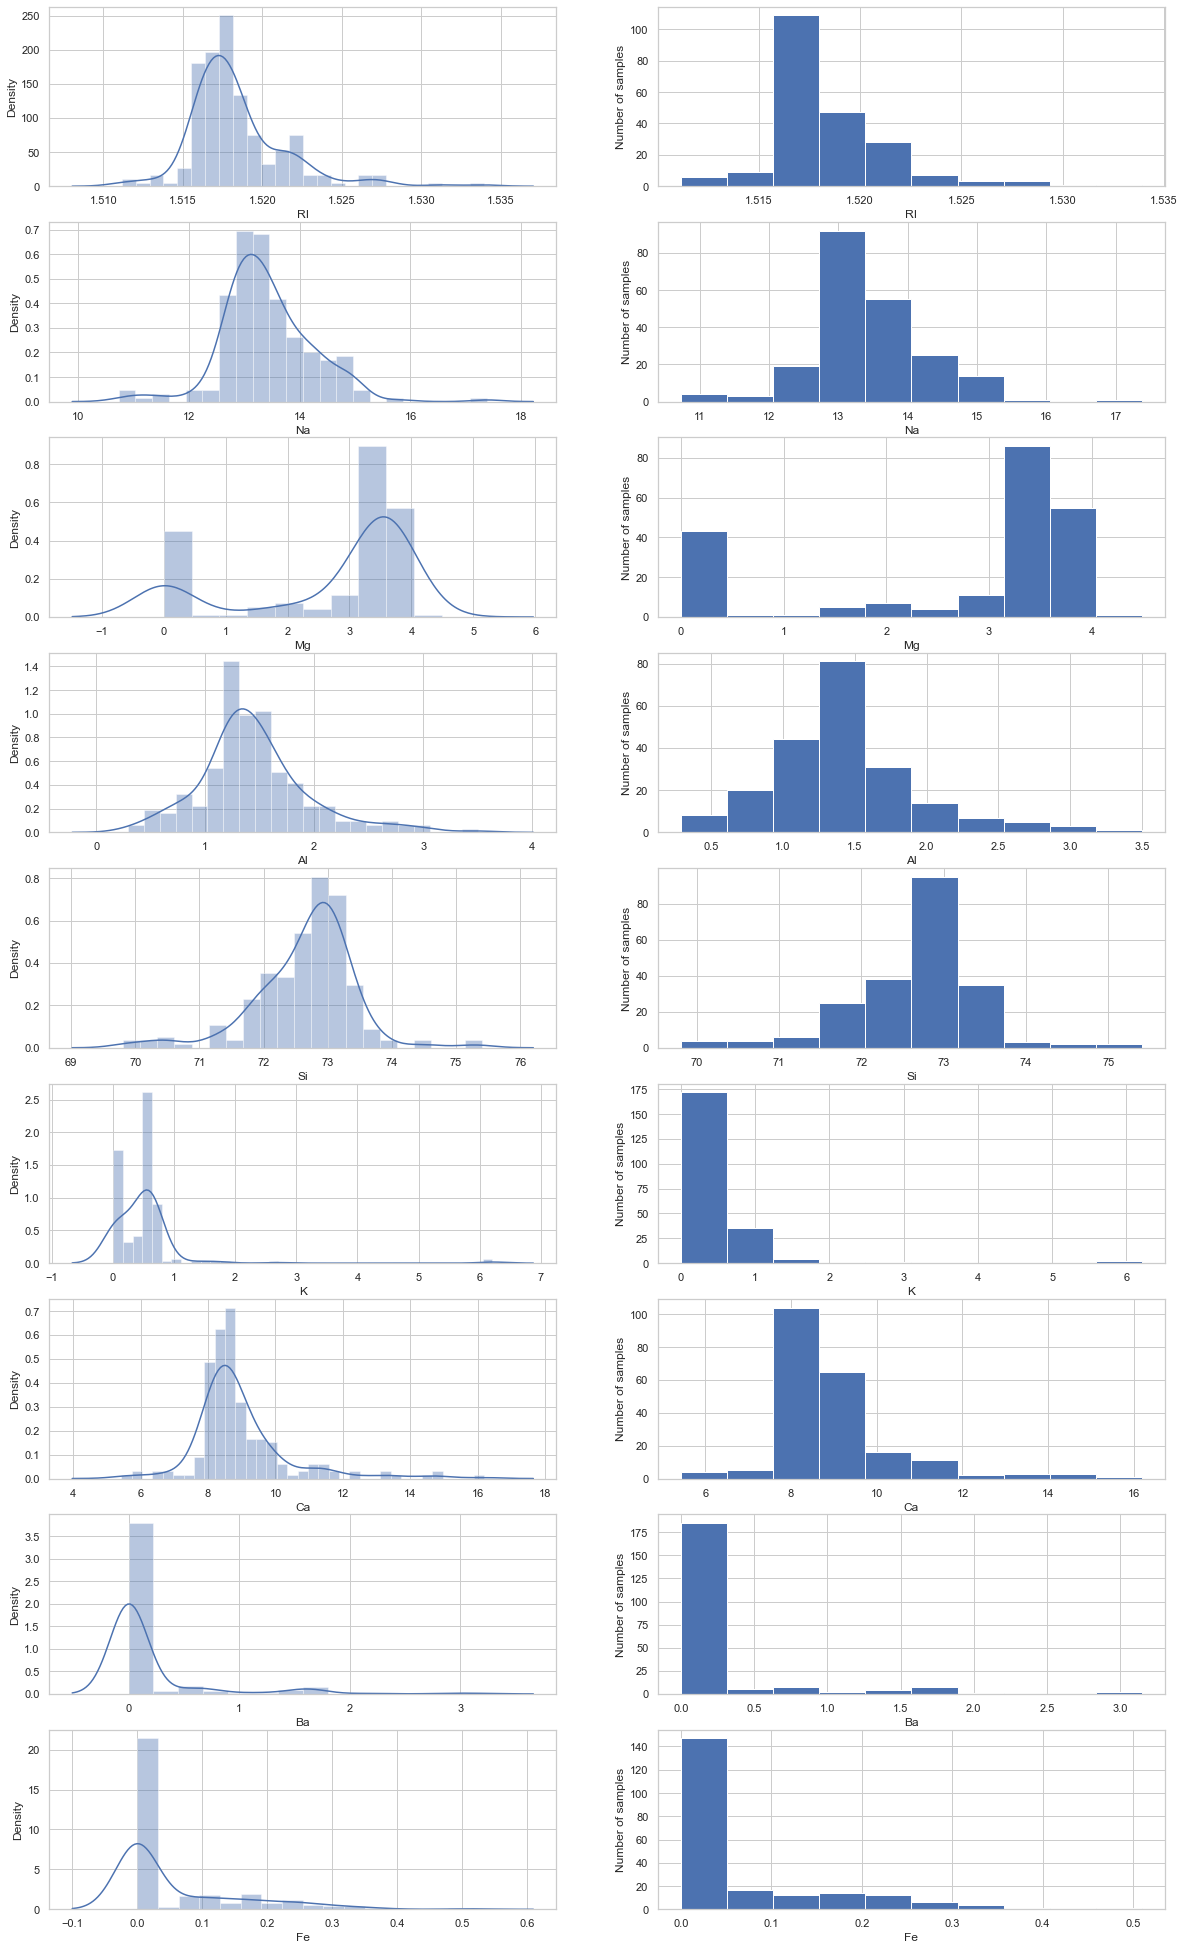

In [4]:
glass = glass_raw.drop('Type', axis=1)
n = 1
plt.figure(figsize = (20, 35))
for i in glass.columns:
    plt.subplot(9,2,n)
    n += 1
    sns.distplot(glass[i])
    plt.subplot(9,2,n)
    n += 1
    plt.hist(glass[i])
    plt.xlabel(i)
    plt.ylabel('Number of samples')
plt.show()

Dzięki rozkładowi atrybutów można zauważyć, że wartość atrybutu RI jest podobna w większości próbek szkła. Znacza ilość próbek nie zawiera róznież żelaza (atrybut Fe) oraz baru (atrybut Ba).

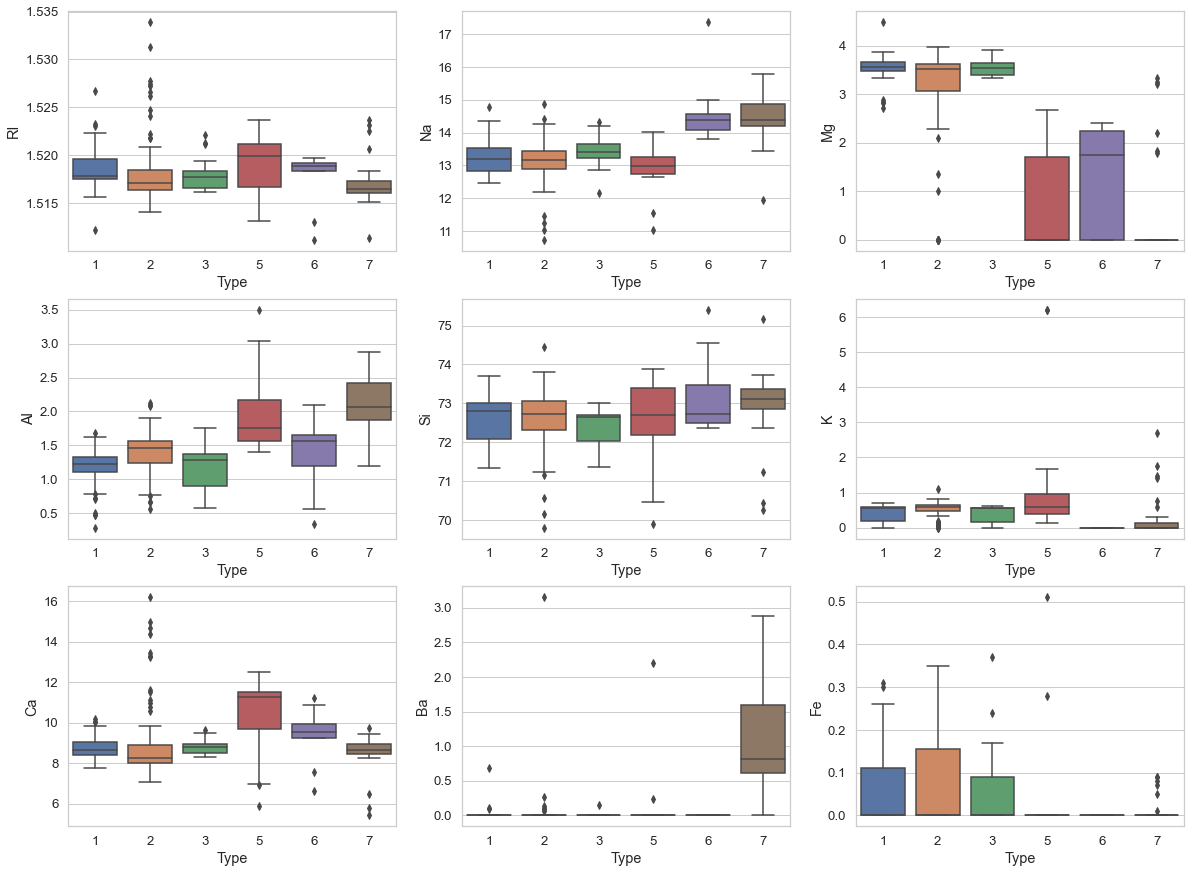

In [5]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
n = 1
for i in glass.columns:
    plt.subplot(3,3,n)
    sns.boxplot(x='Type', y=i, data=glass_raw)
    n+=1
plt.show()

Na wykresach pudełkowych dla różnych typów widać również podobieństwo atrybutu RI w każdym z typów. Można też zauważyć, że zawartość sodu jest wyższa w typach 6 i 7. Ponadto, zawartość magnezu jest nieco wyższa w typach 1, 2 oraz 3, zawartość aluminium w typach 5 i 7. Zawartość krzemu jest najwyższa we wszystkich typach oraz ma podobny zakres w każdym z nich, dlatego raczej nie zapewni potrzebnych informacji do ich rozróżnienia. Z zawartości potasu również nie jesteśmy w stanie wiele odczytać, ale jest ona wyższa dla typu 5 i prawie nie występuje w typie 6. Zawartość wapnia jest największa w typie 5, natomiast baru w typie 7. Żelazo praktycznie nie występuje w danych typach szkła - jest go bardzo mało w porównaniu do innych pierwiastków, jednak najwięcej znajduje się go w typach 1, 2 i 3.

<h2>Macierz wykresów punktowych atrybutów</h2>

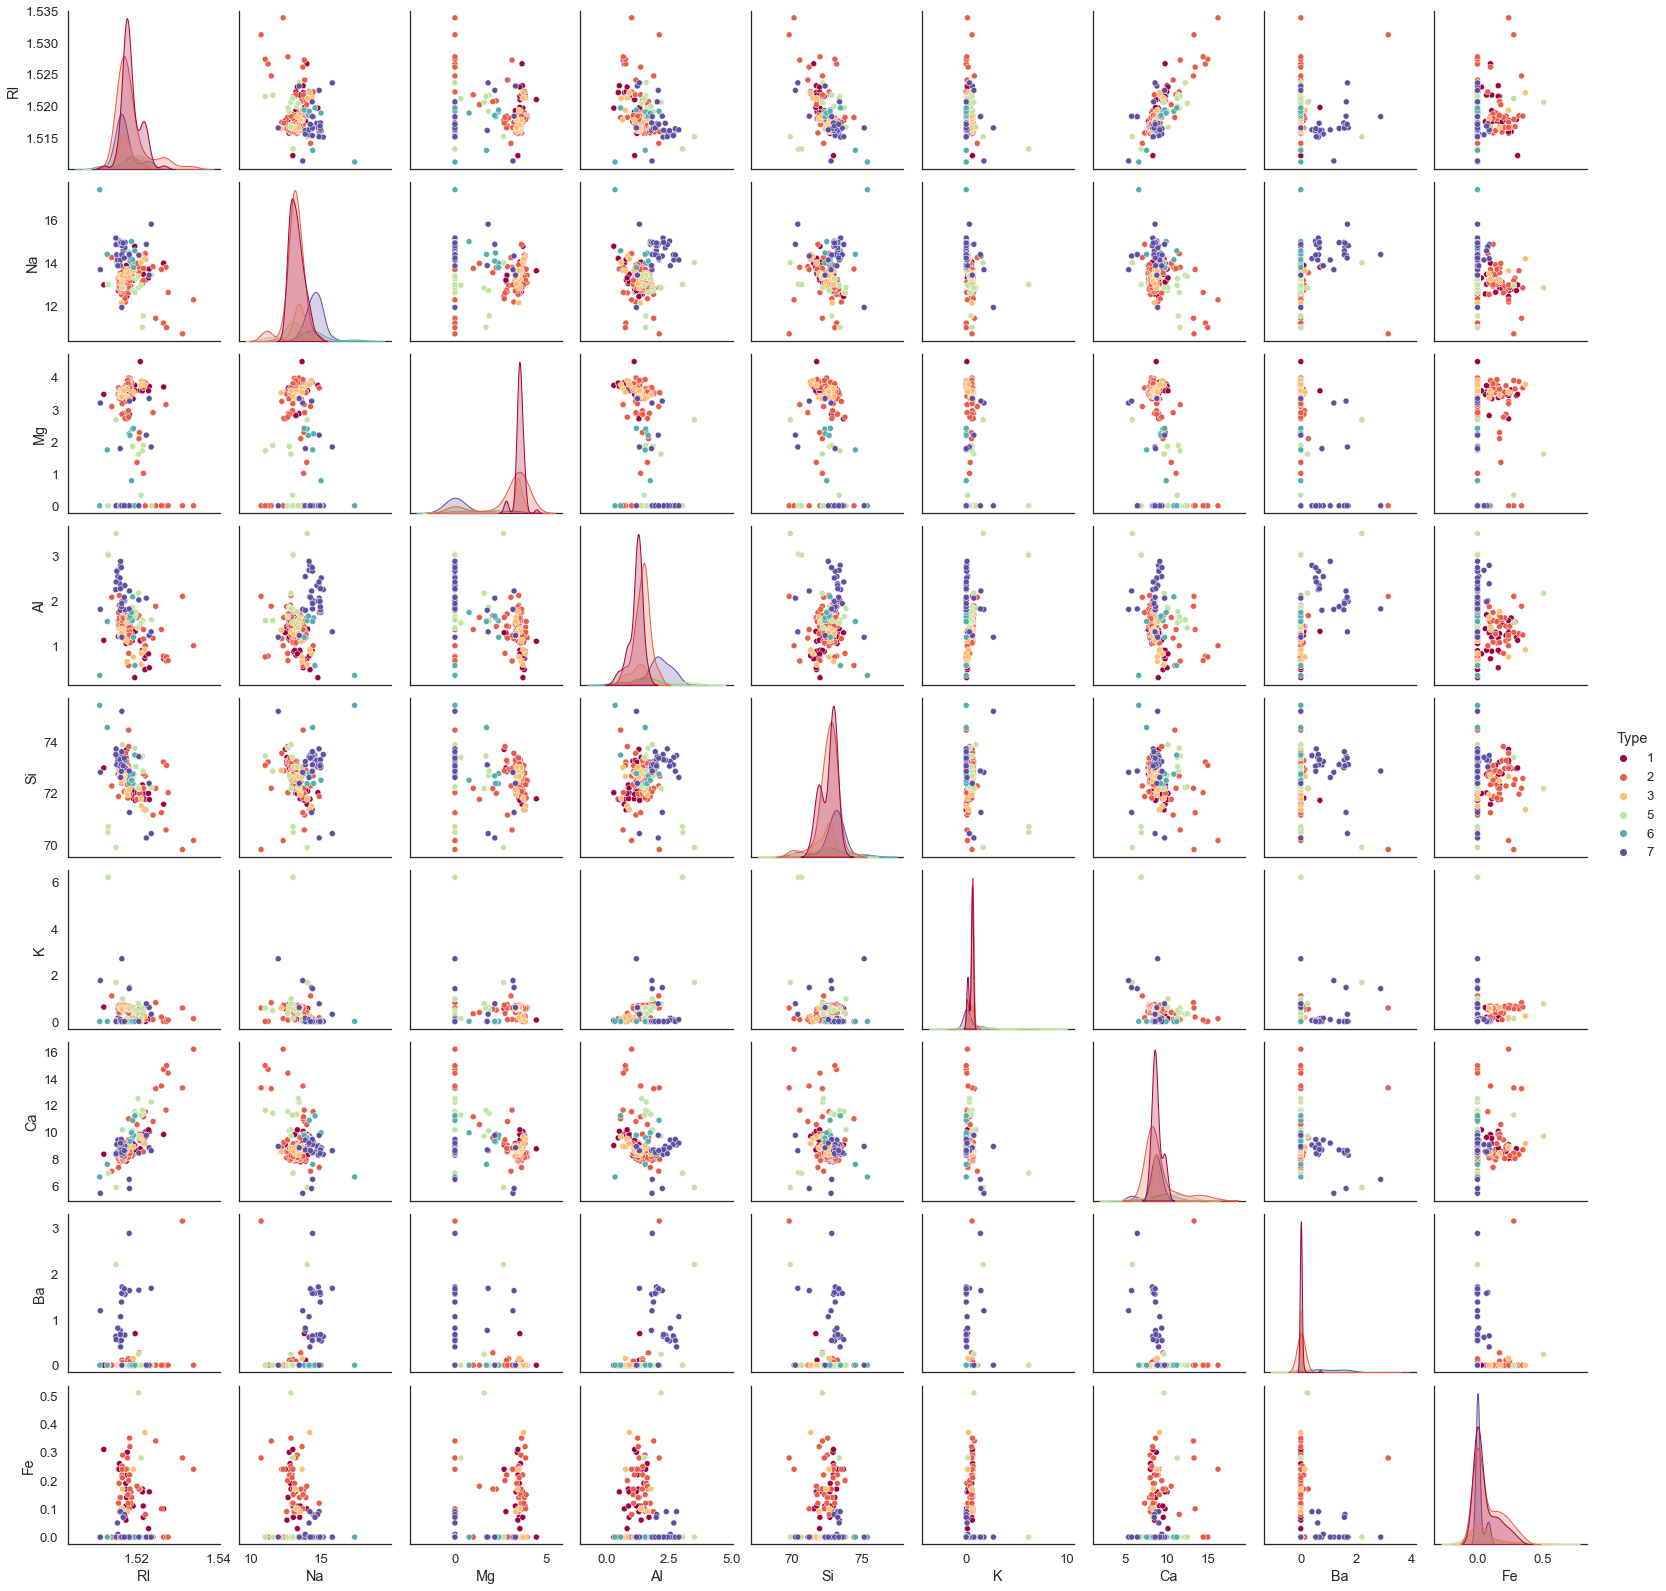

In [6]:
sns.set_style("white")
sns.pairplot(data=glass_raw, kind = 'scatter', hue = 'Type', palette = 'Spectral')

Z macierzy wykresów punktowych można wywnioskować, że dane bardzo się na siebie nakładają i cieżko jest na pierwszy rzut oka rozróżnić poszczególne typy szkła. Najkorzystniejszymi atrybutami wydają się być: Na, Mg, Al. Najgorszymi natomiast są K, Fe oraz Ba, gdyż dla znacznej liczby danych te atrybuty mają wartość 0 i mają dość mały rozrzut. Wyraźnie widać korelację miedzy atrybutami RI oraz Ca oraz można dostrzec przecwiną korelację miedzy atrybutami Si i RI.

<h2>Macierz korelacji</h2>

<AxesSubplot:>

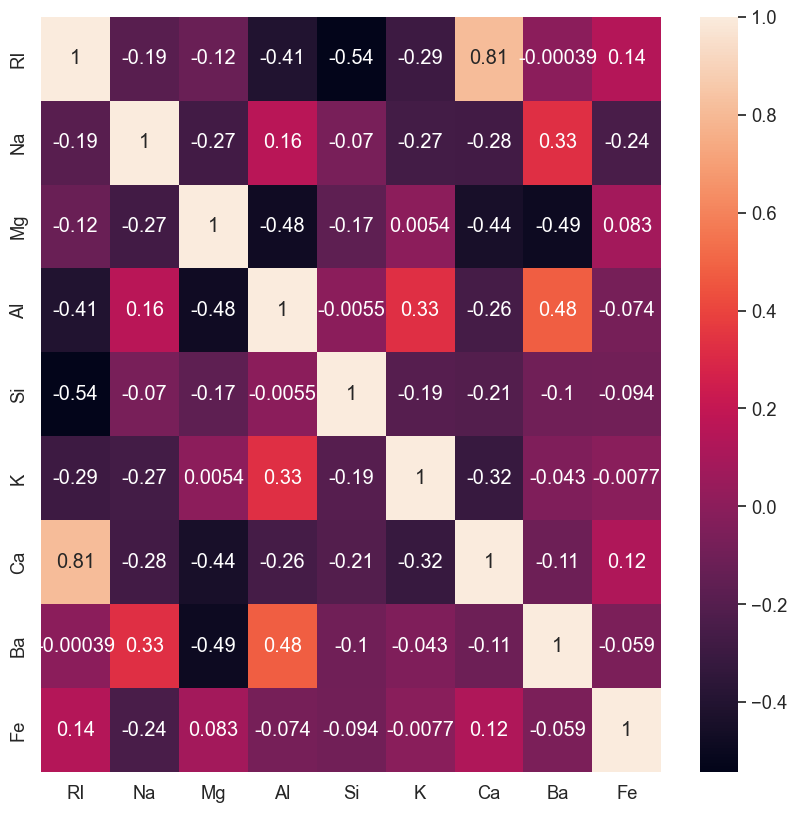

In [7]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(glass.corr(),annot = glass.corr())

Dzięki macierzy korelacji można zauważyć, że najbardziej skorelowane atrybuty to RI oraz Ca, ich wartość korelacji wynosi 0,81. Korelacja między innymi atrybutami praktycznie nie występuje, jedynie można zauważyć, że atrybuty Si oraz Ri mają współczynnik korelacji na poziomie -0,54 więc występuje miedzy nimi korelacja przeciwna, ale w niewielkim stopniu.

<h2>Przygotowanie danych</h2>

In [8]:
X = glass_raw.drop('Type', axis=1)

X_train_us, X_test_us, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_us)
X_test=scaler.transform(X_test_us)

def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(model,X_test,y_test, ax=ax)
    
def borders(model,data,atr_x, atr_y,title,contour = 1):
    if (contour == 1):    
        model.fit(data["X_train"].iloc[:,[atr_x,atr_y]], data["y_train"])
        x_min = min(data["X_train"].iloc[:, atr_x].min(),data["X_test"].iloc[:, atr_x].min())
        x_max = max(data["X_train"].iloc[:, atr_x].max(),data["X_test"].iloc[:, atr_x].max())
        y_min = min(data["X_train"].iloc[:, atr_y].min(),data["X_test"].iloc[:, atr_y].min())
        y_max = max(data["X_train"].iloc[:, atr_y].max(),data["X_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 150)
    plt.title(title)
    if (contour == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(data["X_train"].iloc[:, atr_x], data["X_train"].iloc[:, atr_y], c=data["y_train"], marker = '.')
    plt.scatter(data["X_test"].iloc[:, atr_x], data["X_test"].iloc[:, atr_y], c=data["y_test"], marker = 'x')

Metoda report opisuje skuteczność modelu w klasyfikacji. Wyświetla informacje takie jak:
* precision - miara dokładności klasyfikatora, jest określana jako stosunek prawdziwie pozytywnych wyników do sumy prawdziwie pozytywnych i negatywnych.
* recall - miara kompletności klasyfikatora - zdolność do znajdywania wszystkich pozytywnych wyników, jest określana jako stosunek prawdziwie pozytywnych wyników do sumy prawdziwie pozytywnych i fałszywie negatywnych.
* f1-score - jest średnią harmoniczną miary dokładności i kompletności (precision i recall), gdzie najlepszy jest bliski 1, a najgorszy bliski 0.
* support - jest liczbą rzeczywistych wystąpień klasy w określonym zbiorze danych.
* accuracy - skuteczność klasyfikatora

Ponadto rysuje macierz pomyłek, dzięki której jesteśmy w stanie odczytać jaka klasa została przypisana danym, a jaka jest rzeczywista.

Metoda borders rysuje wykres granic decyzyjnych dla danego modelu oraz dwóch atrybutów, gdzie zbiór uczący oznaczony jest przez kropki (.), a testowy przez "x".


<h2>Modele</h2>

<h3>1. K-NN</h3>

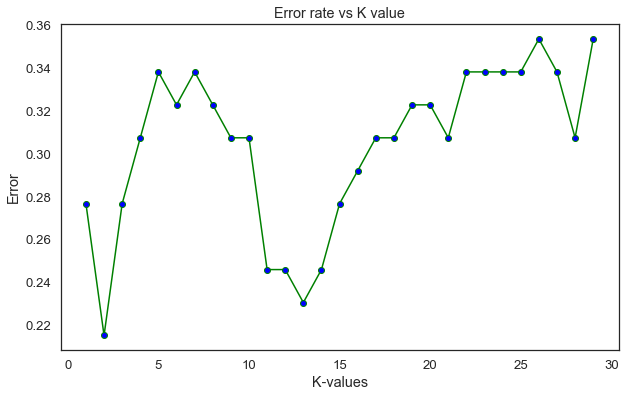

In [17]:
error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize = (10,6))
plt.plot(range(1,30), error, color = 'green', marker = 'o', markerfacecolor = 'blue')
plt.title('Error rate vs K value')
plt.xlabel('K-values')
plt.ylabel('Error')

knn_model=KNeighborsClassifier(n_neighbors=2)

Jak widać na wykresie wartość błędu dla klasyfikatora k-NN wzrasta wraz z liczbą sąsiadów. Dlatego najlepszy przypadek dla klasyfiaktora k-NN będzie dla k = 2.
Klasyfikator działa na zasadzie wybrania klasy dominującej dla danego obiektu poprzez przynależność jego k sąsiadów do tej klasy.

KNN MODEL
              precision    recall  f1-score   support

           1       0.68      0.91      0.78        23
           2       0.90      0.72      0.80        25
           3       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       1.00      0.67      0.80         3
           7       1.00      0.90      0.95        10

    accuracy                           0.78        65
   macro avg       0.76      0.62      0.67        65
weighted avg       0.82      0.78      0.79        65



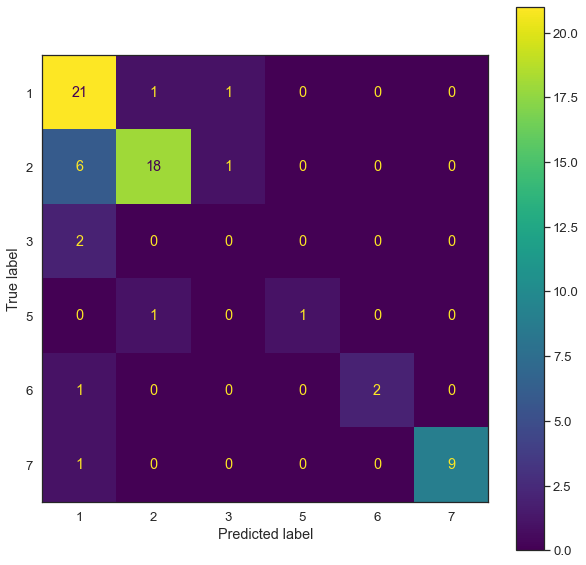

In [18]:
knn_model.fit(X_train,y_train)  
print("KNN MODEL")
report(knn_model)

Na macierzy pomyłek widoczna jest prawdziwa wartość typu szkła oraz jaka wartość została jej przypisana przez klasyfikator k-NN. Można zauważyć, że najprecyzyjniej został przypisany typ 7. Trafność klasyfikatora wyniosła 78%, co jest dość wysokim wynikiem.

<h3>2. Model Bayesa</h3>

Bayes MODEL
              precision    recall  f1-score   support

           1       0.52      0.57      0.54        23
           2       0.60      0.12      0.20        25
           3       0.11      1.00      0.20         2
           5       0.00      0.00      0.00         2
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.46        65
   macro avg       0.50      0.60      0.46        65
weighted avg       0.61      0.46      0.46        65



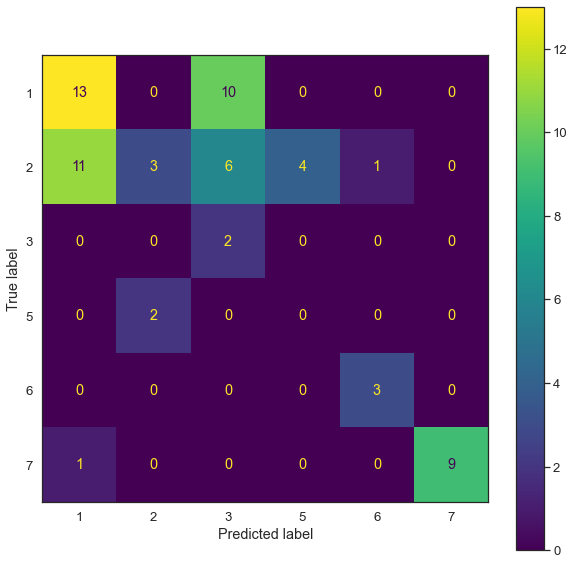

In [20]:
gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)
print("Bayes MODEL")
report(gauss_model)

Model Bayesa opiera się na twierdzeniu Bayesa dotyczącego zdarzeń losowych - posiadania przez obiekt konkretnego zbioru wartości atrybutów oraz przynależności tego obiektu do poszczególnych klas. Do wyznaczenia przynależności wykorzystuje się funkcje dyskryminacyjne.
Dzięki macierzy pomyłek oraz wyświetlonych danych dla klasyfikatora Bayesa można stwierdzić, że jego trafność wynosi 46%, co jest dość niską wartością, nie do zaakceptowania. 

<h3>3. Drzewo decyzyjne</h3>

Decision Tree MODEL
              precision    recall  f1-score   support

           1       0.71      0.65      0.68        23
           2       0.76      0.64      0.70        25
           3       0.00      0.00      0.00         2
           5       0.50      1.00      0.67         2
           6       0.67      0.67      0.67         3
           7       1.00      0.90      0.95        10

    accuracy                           0.68        65
   macro avg       0.61      0.64      0.61        65
weighted avg       0.75      0.68      0.71        65



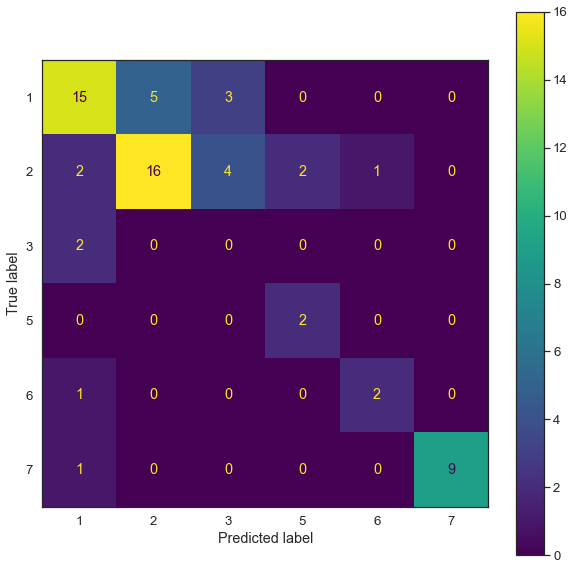

In [21]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision Tree MODEL")
report(dtree)

Klasyfikator ten wykorzystuje drzewo decyzyjne będące strukturą opisującą zbiór danych. Drzewo decyzyjne przedstawia zależności między atrybutami. Klasyfikator ten ma jednak tendencję do przetrenowania, czyli utracenia zdolności generalizacji.
Trafność dla klasyfikatora drzewa decyzyjnego wyniosła 68%, co jest niezłym wynikiem. Jendak klasyfikator k-NN był zdecydowanie trafniejszy.

<h3>4. Model Random Forest</h3>

RFC MODEL
              precision    recall  f1-score   support

           1       0.76      0.70      0.73        23
           2       0.76      0.76      0.76        25
           3       0.25      0.50      0.33         2
           5       0.50      1.00      0.67         2
           6       1.00      0.67      0.80         3
           7       1.00      0.90      0.95        10

    accuracy                           0.75        65
   macro avg       0.71      0.75      0.71        65
weighted avg       0.78      0.75      0.76        65



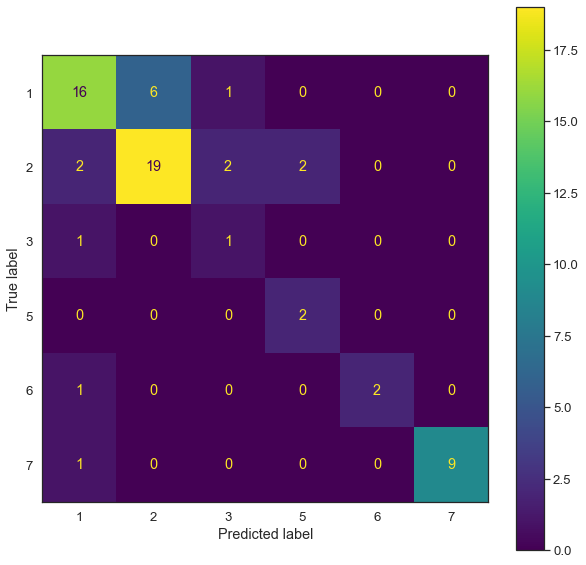

In [22]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)
print("RFC MODEL")
report(rfc_model)

Klasyfikator Random Forest polega na konstruowaniu wielu drzew decyzyjnych w czasie uczenia i generowaniu klasy, która jest dominantą klas (klasyfikacja) lub przewidywaną średnią (regresja) poszczególnych drzew. Pozwala to rozwiązać problem związany z przetrenowaniem w przypadku klasyfikacji za pomocą drzewa decyzyjnego. Jego trafność wyniosła 75%, co jest dość wysokim wynikiem.

<h3>5. Support Vector Machines</h3>

SVC MODEL
              precision    recall  f1-score   support

           1       0.77      0.74      0.76        23
           2       0.72      0.92      0.81        25
           3       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       1.00      0.33      0.50         3
           7       1.00      0.90      0.95        10

    accuracy                           0.78        65
   macro avg       0.75      0.57      0.61        65
weighted avg       0.78      0.78      0.77        65



C:\Users\wylukkoazk\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wylukkoazk\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wylukkoazk\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


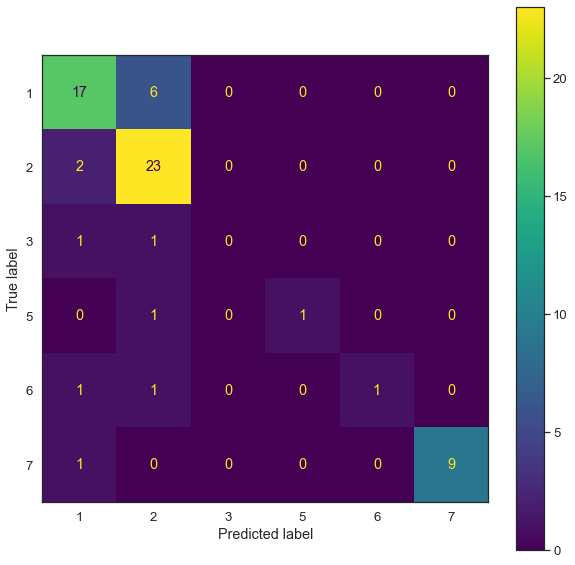

In [23]:
svmMod = SVC()
svmMod.fit(X_train,y_train)
print("SVC MODEL")
report(svmMod)

Maszyna wektorów nośnych (SVM) klasyfikuje dane wykorzystując niejawne przekształcenie zbioru treningowego do przestrzeni cech wyższego wymiaru. W nowej przestrzeni cech dopasowywana jest optymalna hiperpłaszczyzna rozdzielająca dwie klasy danych i jednocześnie maksymalizuje margines pomiędzy hiperpłaszczyzną, a punktami znajdującymi się najbliżej niej, nazywanymi wektorami nośnymi.

Skuteczność tego klasyfikatora wyniosła 78%, co jest również dobrym wynikiem.

Text(0.5, 1.0, 'Models vs Accuracy')

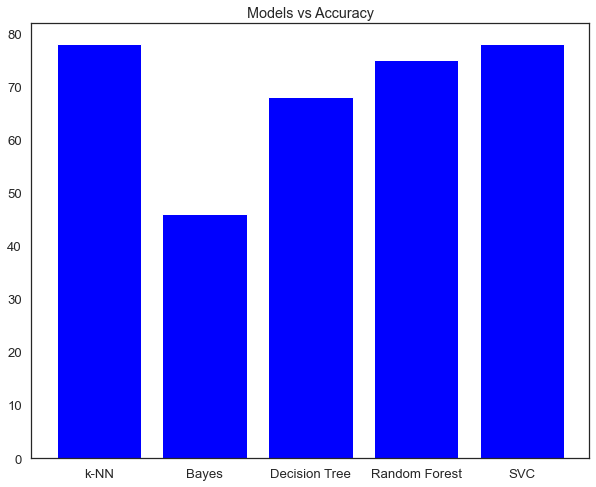

In [24]:
Accuracy = [78,46,68,75,78]
Models = ['k-NN','Bayes','Decision Tree','Random Forest','SVC']

plt.figure(figsize = (10,8))
plt.bar(Models, Accuracy, color = 'blue')
plt.title('Models vs Accuracy')

Jak widać najbardziej skutecznym okazał się model k-NN dla k = 2 oraz model SVC.

<h2>Finalny model</h2>

K-NN MODEL
              precision    recall  f1-score   support

           1       0.68      0.91      0.78        23
           2       0.90      0.72      0.80        25
           3       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       1.00      0.67      0.80         3
           7       1.00      0.90      0.95        10

    accuracy                           0.78        65
   macro avg       0.76      0.62      0.67        65
weighted avg       0.82      0.78      0.79        65



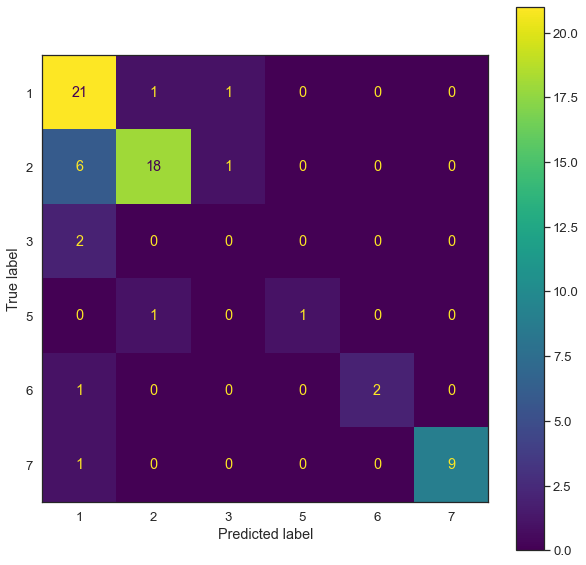

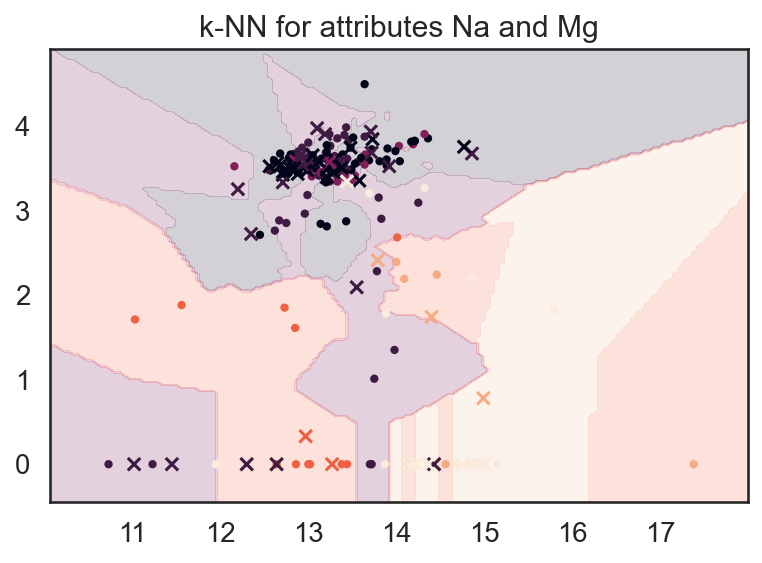

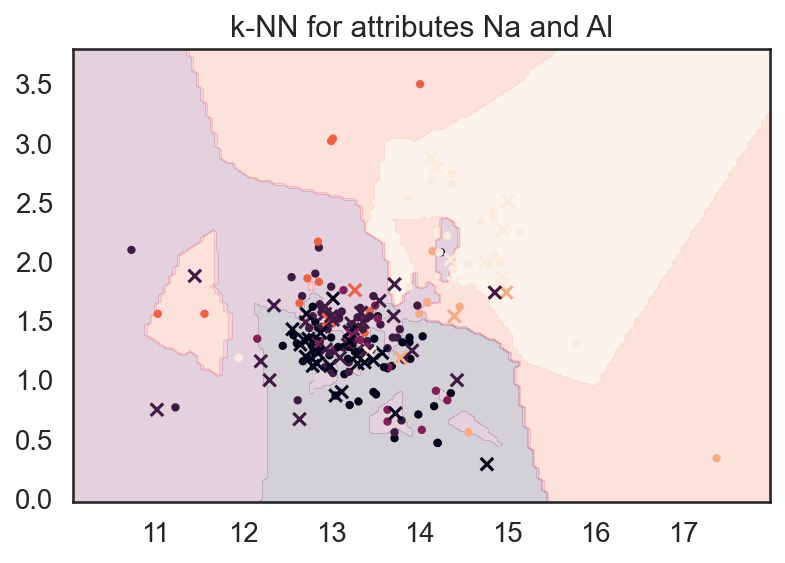

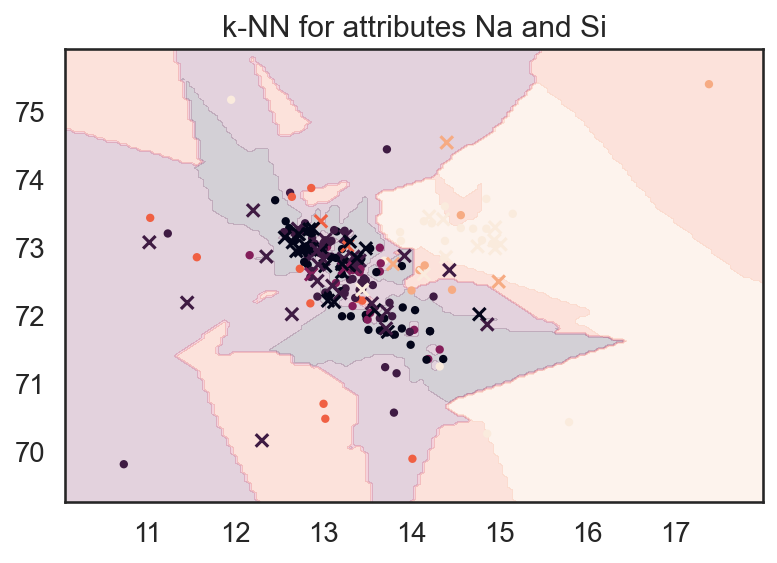

In [25]:
d = {"X_train":X_train_us, "X_test":X_test_us, "y_train":y_train, "y_test":y_test}
knn_model.fit(X_train,y_train)  
print("K-NN MODEL")
report(knn_model)

for i in [2,3,4]:
    borders(knn_model,d,1,i,"k-NN for attributes " + glass.columns[1] + " and " + glass.columns[i])


Dzięki wykresom granic decyzyjnych dla poszczególnych atrybutów można zobaczyć wysoką skuteczność klasyfikatora k-NN. Znaczna część danych testowych znajduje się w "swoich"  granicach, co sugeruje 78% skuteczność klasyfikatora.

<h2>Wnioski</h2>

* Mimo, iż z macierzy wykresów punktowych ciężko było za pomocą wzroku rozróżnić poszczególne typy szkła, to jednak większość użytych klasyfikatorów osiągnęła dość wysoką skuteczność w klasyfikacji danych.
* Najlepszym wynikiem wykazał się klasyfikator najbliższego sąsiada ze skutecznościoą 78%, co jest zadowalającym wynikiem biorąc pod uwagę rozłożenie danych.
* Kolejnym najlepszym klasyfikatorem okazał się klasyfikator SVC - 78% skuteczności, niewiele gorszym był klasyfikator losowego lasu - 75% skuteczności.
* Pozostałe klasyfikatory wykazały się dość niską skutecznością: drzewo decyzyjne - 68% oraz naiwny klasyfikator Bayesa - 46%.

<h3>Wykonali</h3>
<ul>
    <li>Jakub Słabicki</li>
    <li>Jakub Wyłucki</li>
</ul>

<h3>Bibliografia</h3>

* https://www.kaggle.com/rachelswati/glass-classification
* https://www.kaggle.com/nityanandhiremath/80-accuracy
* https://github.com/p-sama/Glass-Classification/blob/master/452-IndividualProject-GlassClassification.ipynb?fbclid=IwAR0d_UU8NMXIY5bSK2dd68RfxLM53qvYDt8N7gjJt0BbS3SxKh1f6XcQiNI
* http://www.mif.pg.gda.pl/homepages/kdz/BIGDATA/AniaPielowska.pdf
* https://pl.wikipedia.org/wiki/Las_losowy